# Pandas

pandas extends the numpy ndarray to allow for a data-structure that labels the columns (called a data frame)

In this manner, its main competition is R--the data frame provides the functionality for data analysis that R natively presents

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## series

A series is a labeled array.  It looks superficially like a dictionary, but is fixed size, and can handle missing values.  It also can also be operated on with any numpy operation or the standard operators (a dictionary cannot)

Some examples from: http://pandas.pydata.org/pandas-docs/stable/dsintro.html

In [2]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a   -0.703337
b   -0.325814
c   -0.566975
d   -1.108292
e    0.459929
dtype: float64

In [3]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [4]:
pd.Series(np.random.randn(5))

0    1.529094
1    0.192635
2   -0.989706
3    0.335290
4   -0.321017
dtype: float64

you can initialize from a dictionary

In [5]:
d = {'a' : 0., 'b' : 1., 'c' : 2.}
pd.Series(d)

a    0
b    1
c    2
dtype: float64

In [6]:
pd.Series(d, index=['b', 'c', 'd', 'a'])

b     1
c     2
d   NaN
a     0
dtype: float64

Note that NaN indicates a missing value

you can operate on a series as you would any ndarray

In [8]:
s

a   -0.703337
b   -0.325814
c   -0.566975
d   -1.108292
e    0.459929
dtype: float64

In [9]:
s[0]

-0.70333685096756748

In [10]:
s[:3]

a   -0.703337
b   -0.325814
c   -0.566975
dtype: float64

In [11]:
s

a   -0.703337
b   -0.325814
c   -0.566975
d   -1.108292
e    0.459929
dtype: float64

In [12]:
s[s > s.median()]

b   -0.325814
e    0.459929
dtype: float64

In [13]:
np.exp(s)

a    0.494931
b    0.721940
c    0.567239
d    0.330122
e    1.583962
dtype: float64

you can also index by label

In [14]:
s['a']

-0.70333685096756748

In [15]:
s['e']

0.45992941214662875

In [16]:
'e' in s

True

In [17]:
s.get('f', np.nan)

nan

In [18]:
s + s

a   -1.406674
b   -0.651627
c   -1.133950
d   -2.216583
e    0.919859
dtype: float64

In [19]:
s * 2

a   -1.406674
b   -0.651627
c   -1.133950
d   -2.216583
e    0.919859
dtype: float64

note that operations are always done on like labels, so the following is not exactly the same as numpy arrays.  In this sense, pandas results respect the union of indices 

In [20]:
s[1:] + s[:-1]

a         NaN
b   -0.651627
c   -1.133950
d   -2.216583
e         NaN
dtype: float64

In [22]:
s[1:]

b   -0.325814
c   -0.566975
d   -1.108292
e    0.459929
dtype: float64

In [23]:
s[:-1]

a   -0.703337
b   -0.325814
c   -0.566975
d   -1.108292
dtype: float64

a series can have a name

In [24]:
s = pd.Series(np.random.randn(5), name='something')
s

0    2.066135
1   -0.125003
2   -0.146985
3   -1.701907
4    0.947627
Name: something, dtype: float64

## DataFrame

The dataframe is like a spreadsheet -- the columns and rows have labels.  It is 2-d

you can initialize from Series

In [36]:
d = {'one' : pd.Series([1., 2., 3.], index=['b', 'a', 'c']),
     'two' : pd.Series([2, 1., 3., 4.], index=['b', 'a', 'c', 'd'])}

In [37]:
df = pd.DataFrame(d)
df

,one,two
a,2,1
b,1,2
c,3,3
d,NaN,4


In IPython, tab completion for column names is enabled

In [38]:
df.mean()

one    2.0
two    2.5
dtype: float64

In [39]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4
b,1,2
a,2,1


or from lists / ndarrays

In [40]:
d = {'one' : [1., 2., 3., 4.],
     'two' : [4., 3., 2., 1.]}

In [41]:
pd.DataFrame(d)

,one,two
0,1,4
1,2,3
2,3,2
3,4,1


In [42]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])

,one,two
a,1,4
b,2,3
c,3,2
d,4,1


there are lots of other initialization methods, e.g, list of dicts

In [43]:
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
pd.DataFrame(data2, index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20


Working with the dataframe

you can index it as it it were Series objects

In [44]:
df['one']

a     2
b     1
c     3
d   NaN
Name: one, dtype: float64

In [45]:
df

,one,two
a,2,1
b,1,2
c,3,3
d,NaN,4


In [46]:
type(df['one'])

pandas.core.series.Series

In [47]:
df['three'] = df['one'] * df['two']
df['flag'] = df['one'] > 2
df

,one,two,three,flag
a,2,1,2,False
b,1,2,2,False
c,3,3,9,True
d,NaN,4,NaN,False


you can delete or pop columns

In [48]:
del df['two']

In [49]:
three = df.pop('three')

In [50]:
df

,one,flag
a,2,False
b,1,False
c,3,True
d,NaN,False


In [51]:
three

a     2
b     2
c     9
d   NaN
Name: three, dtype: float64

initialize with a scalar

In [52]:
df['foo'] = 'bar'

In [53]:
df

,one,flag,foo
a,2,False,bar
b,1,False,bar
c,3,True,bar
d,NaN,False,bar


## CSV

you can also read from CSV

Note, if there is stray whitespace in your strings in the CSV, pandas will keep it.  This is a bit annoying, and you might need to investigate converters to get things properly formatted.

There are similar methods for HDF5 and excel

In [58]:
grades = pd.read_csv('sample.csv', index_col="student", skipinitialspace=True)

In [59]:
grades

,hw 1,hw 2,hw 3,hw 4,exam
student,,,,,
A,10,9,10,7,97
B,8,7,9,9,82
C,NaN,9,6,5,75
D,8,9,9,9,90
E,NaN,10,10,10,95
F,8,2,6,7,66
G,6,NaN,4,5,60
H,8,8,9,8,84
I,10,7,10,10,92


In [60]:
grades.index

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q'],
      dtype='object', name='student')

In [61]:
grades.columns

Index(['hw 1', 'hw 2', 'hw 3', 'hw 4', 'exam'], dtype='object')

In [62]:
grades.ix["A"]

hw 1    10
hw 2     9
hw 3    10
hw 4     7
exam    97
Name: A, dtype: float64

In [63]:
grades['hw 1']

student
A    10
B     8
C   NaN
D     8
E   NaN
F     8
G     6
H     8
I    10
J    10
K     8
L     3
M     9
N     8
O    10
P     8
Q     5
Name: hw 1, dtype: float64

In [64]:
grades['hw average'] = (grades['hw 1'] + grades['hw 2'] + grades['hw 3'] + grades['hw 4'])/4.0

In [65]:
grades

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
A,10,9,10,7,97,9.00
B,8,7,9,9,82,8.25
C,NaN,9,6,5,75,NaN
D,8,9,9,9,90,8.75
E,NaN,10,10,10,95,NaN
F,8,2,6,7,66,5.75
G,6,NaN,4,5,60,NaN
H,8,8,9,8,84,8.25
I,10,7,10,10,92,9.25


this didn't handle the missing data properly

In [66]:
g2 = grades.fillna(0)

In [67]:
g2['hw average'] = (g2['hw 1'] + g2['hw 2'] + g2['hw 3'] + g2['hw 4'])/4.0

In [68]:
g2

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
A,10,9,10,7,97,9.00
B,8,7,9,9,82,8.25
C,0,9,6,5,75,5.00
D,8,9,9,9,90,8.75
E,0,10,10,10,95,7.50
F,8,2,6,7,66,5.75
G,6,0,4,5,60,3.75
H,8,8,9,8,84,8.25
I,10,7,10,10,92,9.25


For big dataframes, we can view just pieces

In [69]:
g2.head()

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
A,10,9,10,7,97,9.00
B,8,7,9,9,82,8.25
C,0,9,6,5,75,5.00
D,8,9,9,9,90,8.75
E,0,10,10,10,95,7.50


In [70]:
g2.tail(2)

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
P,8,9,8,10,94,8.75
Q,5,7,6,5,78,5.75


### statistics

we get lots of statistics

In [71]:
g2.describe()

,hw 1,hw 2,hw 3,hw 4,exam,hw average
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,7.000000,7.470588,7.882353,8.000000,85.000000,7.588235
std,3.221025,2.741296,1.964763,1.732051,11.407235,1.747635
min,0.000000,0.000000,4.000000,5.000000,60.000000,3.750000
25%,6.000000,7.000000,6.000000,7.000000,78.000000,5.750000
50%,8.000000,8.000000,9.000000,9.000000,90.000000,8.250000
75%,9.000000,9.000000,9.000000,9.000000,94.000000,8.750000
max,10.000000,10.000000,10.000000,10.000000,99.000000,9.750000


want to sort by values?

In [72]:
g2.sort_values(by="exam")

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
G,6,0,4,5,60,3.75
F,8,2,6,7,66,5.75
L,3,8,5,7,71,5.75
C,0,9,6,5,75,5.00
Q,5,7,6,5,78,5.75
B,8,7,9,9,82,8.25
H,8,8,9,8,84,8.25
K,8,7,6,8,87,7.25
D,8,9,9,9,90,8.75


In [73]:
g2.mean()

hw 1           7.000000
hw 2           7.470588
hw 3           7.882353
hw 4           8.000000
exam          85.000000
hw average     7.588235
dtype: float64

In [74]:
g2.median()

hw 1           8.00
hw 2           8.00
hw 3           9.00
hw 4           9.00
exam          90.00
hw average     8.25
dtype: float64

In [75]:
g2.max()

hw 1          10.00
hw 2          10.00
hw 3          10.00
hw 4          10.00
exam          99.00
hw average     9.75
dtype: float64

In [76]:
g2

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
A,10,9,10,7,97,9.00
B,8,7,9,9,82,8.25
C,0,9,6,5,75,5.00
D,8,9,9,9,90,8.75
E,0,10,10,10,95,7.50
F,8,2,6,7,66,5.75
G,6,0,4,5,60,3.75
H,8,8,9,8,84,8.25
I,10,7,10,10,92,9.25


In [77]:
g2.apply(lambda x: x.max() - x.min())

hw 1          10
hw 2          10
hw 3           6
hw 4           5
exam          39
hw average     6
dtype: float64

### access

Pandas provides optimizes methods for accessing data: .at, .iat, .loc, .iloc, and .ix

The standard slice notation works for rows, but note *when using labels, both endpoints are included*

In [78]:
g2["E":"I"]

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
E,0,10,10,10,95,7.50
F,8,2,6,7,66,5.75
G,6,0,4,5,60,3.75
H,8,8,9,8,84,8.25
I,10,7,10,10,92,9.25


In [79]:
g2.loc[:,["hw 1", "exam"]]

,hw 1,exam
student,,
A,10,97
B,8,82
C,0,75
D,8,90
E,0,95
F,8,66
G,6,60
H,8,84
I,10,92


`at` is a faster access method

In [80]:
g2.at["A","exam"]

97

The `i` routines work in index space, similar to how numpy does

In [81]:
g2.iloc[3:5,0:2]

,hw 1,hw 2
student,,
D,8,9
E,0,10


In [82]:
g2.iloc[[1,3,5], [1,2,3,4]]

,hw 2,hw 3,hw 4,exam
student,,,,
B,7,9,9,82
D,9,9,9,90
F,2,6,7,66


In [83]:
g2.iat[2,2]

6

### boolean indexing

In [85]:
g2[g2.exam > 90]

,hw 1,hw 2,hw 3,hw 4,exam,hw average
student,,,,,,
A,10,9,10,7,97,9.00
E,0,10,10,10,95,7.50
I,10,7,10,10,92,9.25
J,10,6,9,9,91,8.50
M,9,9,8,9,94,8.75
O,10,10,10,9,99,9.75
P,8,9,8,10,94,8.75


### np arrays

In [86]:
g2.loc[:, "new"] = np.random.random(len(g2))

In [87]:
g2

,hw 1,hw 2,hw 3,hw 4,exam,hw average,new
student,,,,,,,
A,10,9,10,7,97,9.00,0.672079
B,8,7,9,9,82,8.25,0.435800
C,0,9,6,5,75,5.00,0.031942
D,8,9,9,9,90,8.75,0.638359
E,0,10,10,10,95,7.50,0.450061
F,8,2,6,7,66,5.75,0.498565
G,6,0,4,5,60,3.75,0.721334
H,8,8,9,8,84,8.25,0.546910
I,10,7,10,10,92,9.25,0.472119


resetting values

In [88]:
a = g2[g2.exam < 80].index

In [89]:
a

Index(['C', 'F', 'G', 'L', 'Q'], dtype='object', name='student')

In [90]:
g2.loc[a, "exam"] = 80

In [91]:
g2

,hw 1,hw 2,hw 3,hw 4,exam,hw average,new
student,,,,,,,
A,10,9,10,7,97,9.00,0.672079
B,8,7,9,9,82,8.25,0.435800
C,0,9,6,5,80,5.00,0.031942
D,8,9,9,9,90,8.75,0.638359
E,0,10,10,10,95,7.50,0.450061
F,8,2,6,7,80,5.75,0.498565
G,6,0,4,5,80,3.75,0.721334
H,8,8,9,8,84,8.25,0.546910
I,10,7,10,10,92,9.25,0.472119


## histogramming

In [92]:
g2["exam"].value_counts()

80    5
94    2
90    2
95    1
92    1
91    1
87    1
84    1
82    1
99    1
97    1
Name: exam, dtype: int64

## plotting

In [93]:
%matplotlib inline

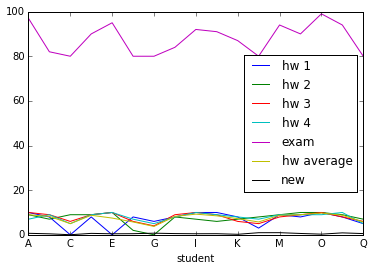

In [94]:
g2.plot()

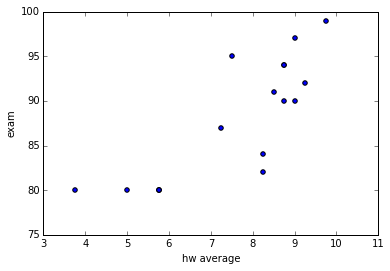

In [95]:
g2.plot.scatter(x="hw average", y="exam", marker="o")

A lot more examples at: http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [96]:
g2

,hw 1,hw 2,hw 3,hw 4,exam,hw average,new
student,,,,,,,
A,10,9,10,7,97,9.00,0.672079
B,8,7,9,9,82,8.25,0.435800
C,0,9,6,5,80,5.00,0.031942
D,8,9,9,9,90,8.75,0.638359
E,0,10,10,10,95,7.50,0.450061
F,8,2,6,7,80,5.75,0.498565
G,6,0,4,5,80,3.75,0.721334
H,8,8,9,8,84,8.25,0.546910
I,10,7,10,10,92,9.25,0.472119


In [97]:
g2.loc["R", :] = 1

In [98]:
g2

,hw 1,hw 2,hw 3,hw 4,exam,hw average,new
student,,,,,,,
A,10,9,10,7,97,9.00,0.672079
B,8,7,9,9,82,8.25,0.435800
C,0,9,6,5,80,5.00,0.031942
D,8,9,9,9,90,8.75,0.638359
E,0,10,10,10,95,7.50,0.450061
F,8,2,6,7,80,5.75,0.498565
G,6,0,4,5,80,3.75,0.721334
H,8,8,9,8,84,8.25,0.546910
I,10,7,10,10,92,9.25,0.472119


In [99]:
g2.to_latex()

'\\begin{tabular}{lrrrrrrr}\n\\toprule\n{} &  hw 1 &  hw 2 &  hw 3 &  hw 4 &  exam &  hw average &       new \\\\\nstudent &       &       &       &       &       &             &           \\\\\n\\midrule\nA       &    10 &     9 &    10 &     7 &    97 &        9.00 &  0.672079 \\\\\nB       &     8 &     7 &     9 &     9 &    82 &        8.25 &  0.435800 \\\\\nC       &     0 &     9 &     6 &     5 &    80 &        5.00 &  0.031942 \\\\\nD       &     8 &     9 &     9 &     9 &    90 &        8.75 &  0.638359 \\\\\nE       &     0 &    10 &    10 &    10 &    95 &        7.50 &  0.450061 \\\\\nF       &     8 &     2 &     6 &     7 &    80 &        5.75 &  0.498565 \\\\\nG       &     6 &     0 &     4 &     5 &    80 &        3.75 &  0.721334 \\\\\nH       &     8 &     8 &     9 &     8 &    84 &        8.25 &  0.546910 \\\\\nI       &    10 &     7 &    10 &    10 &    92 &        9.25 &  0.472119 \\\\\nJ       &    10 &     6 &     9 &     9 &    91 &        8.50 &  0.493867 